### Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [ ]:
path = "/content/drive/MyDrive/Kidney_Dataset/kidney_disease.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reading the dataset

In [ ]:
# loading data

df= pd.read_csv('kidney_disease_dataset.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.shape

(400, 26)

In [ ]:
df.drop('id', axis = 1, inplace = True)

In [ ]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [ ]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [ ]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [ ]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



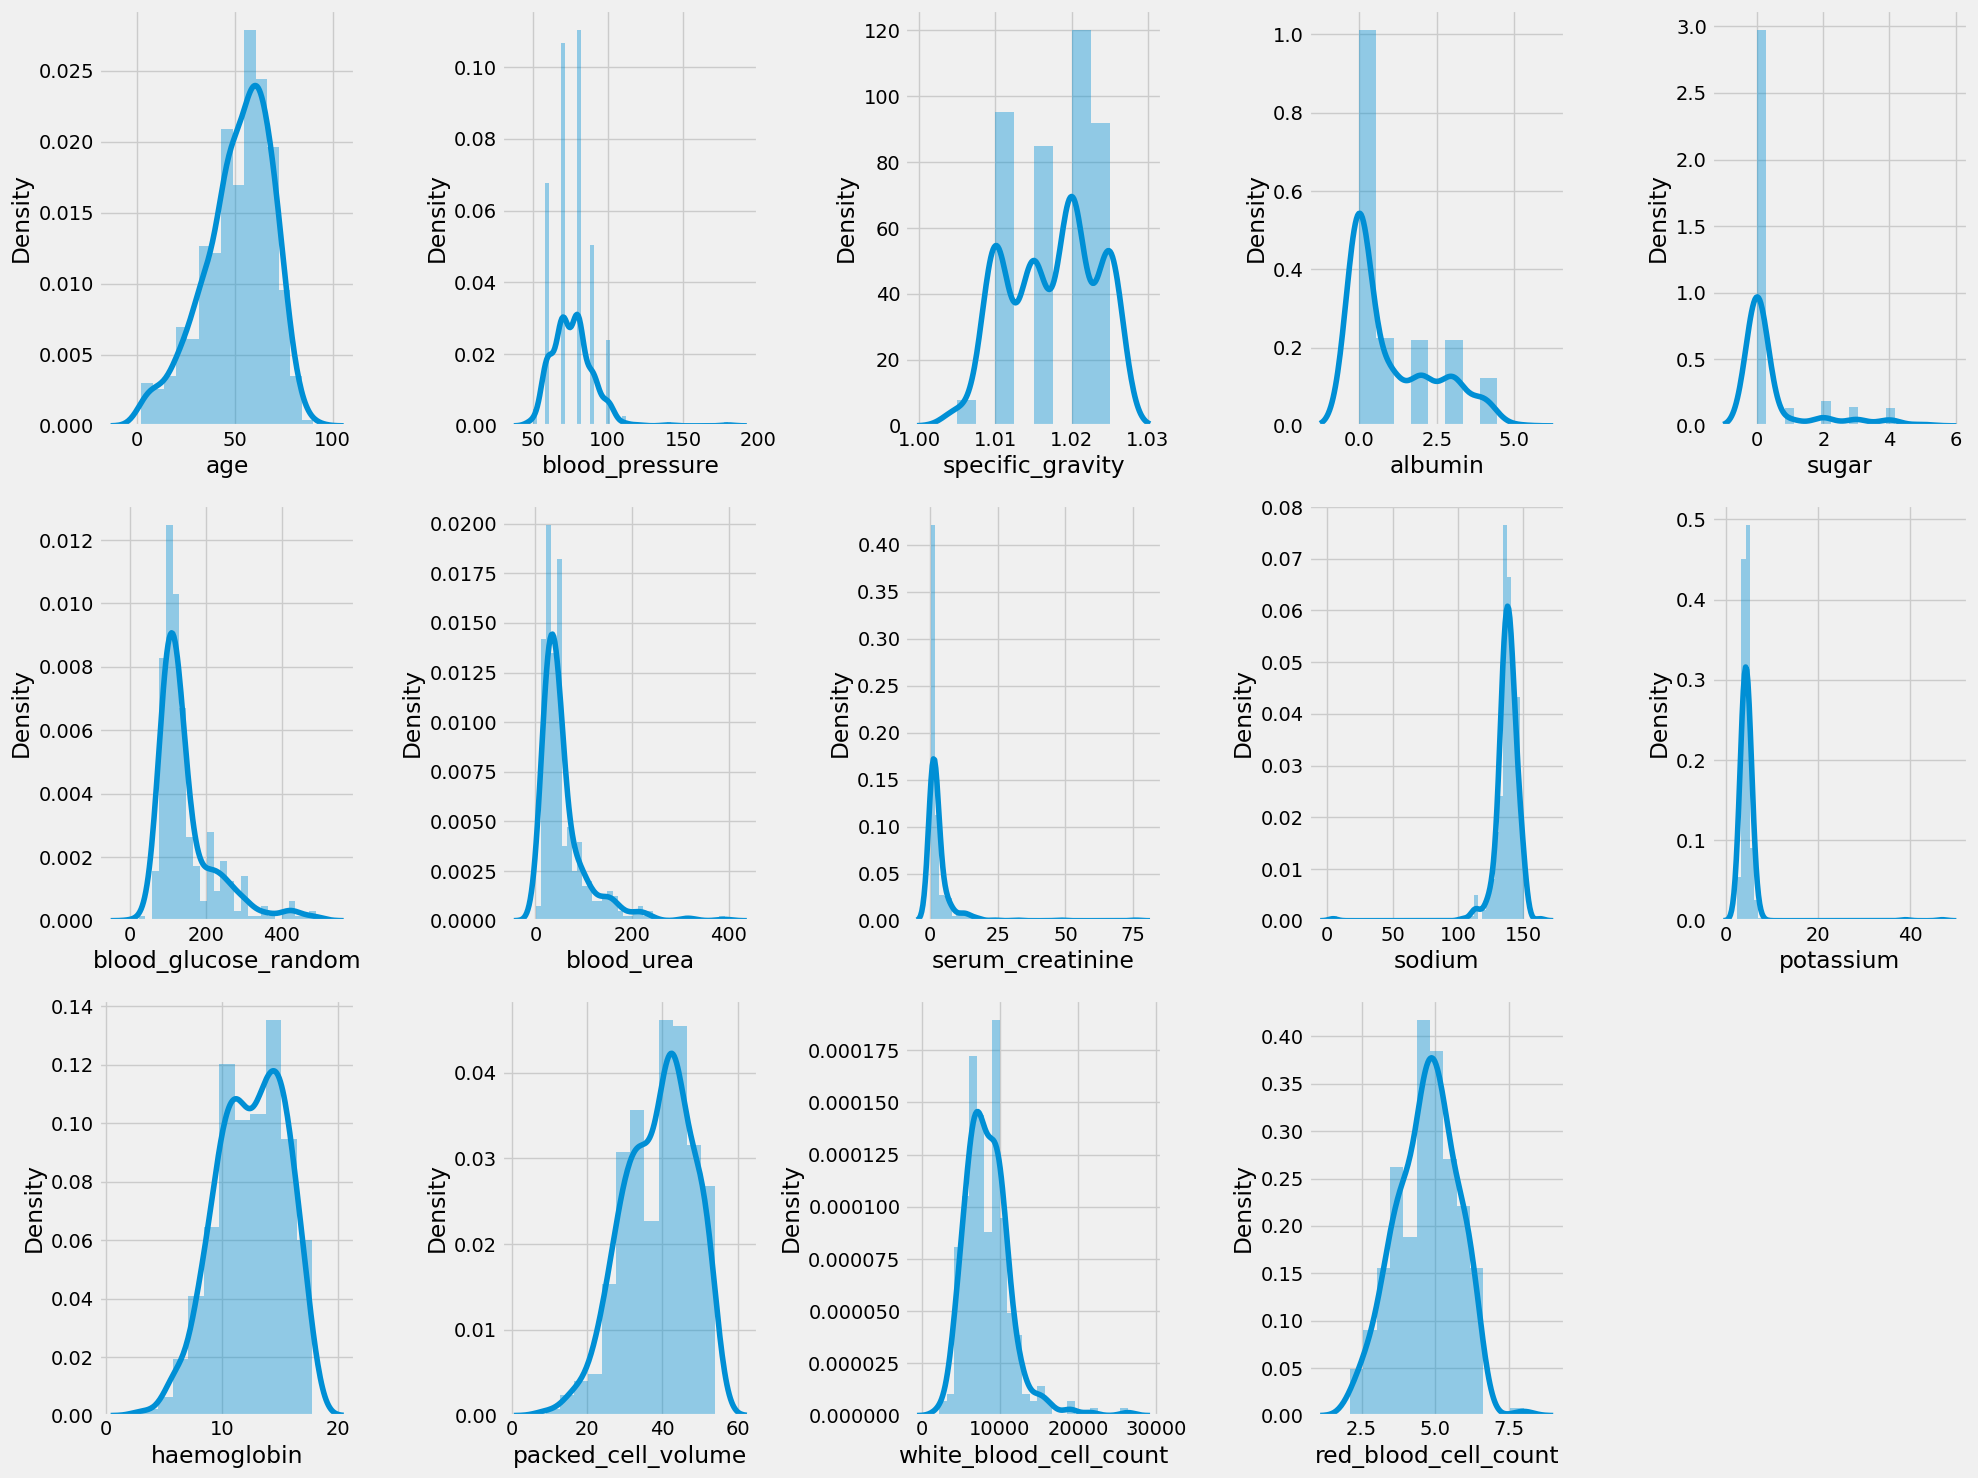

In [ ]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

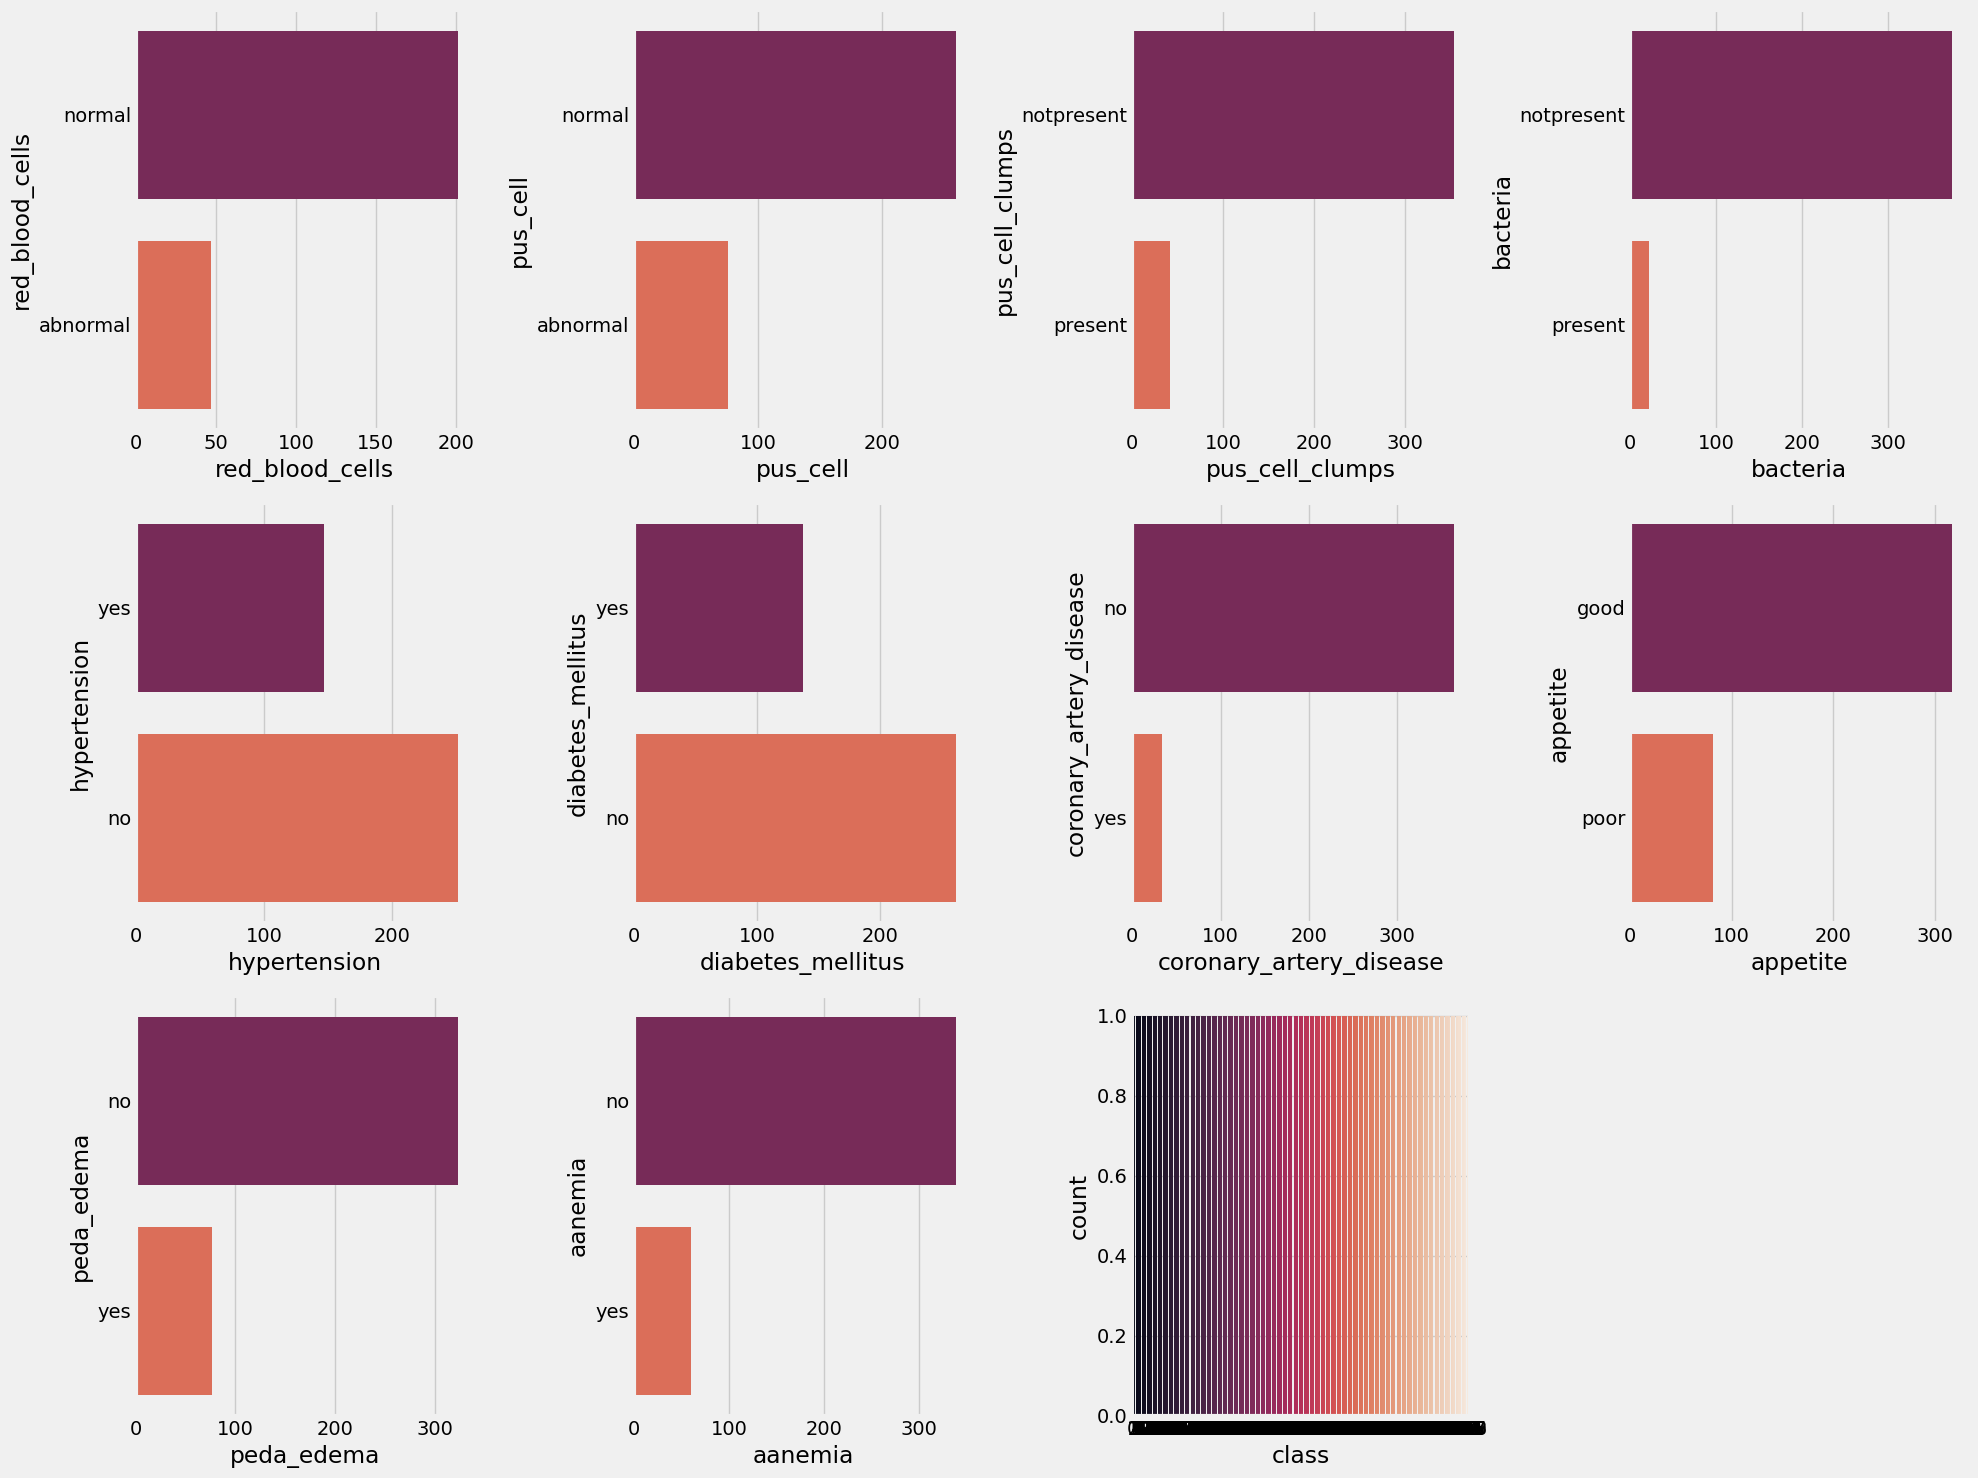

In [ ]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

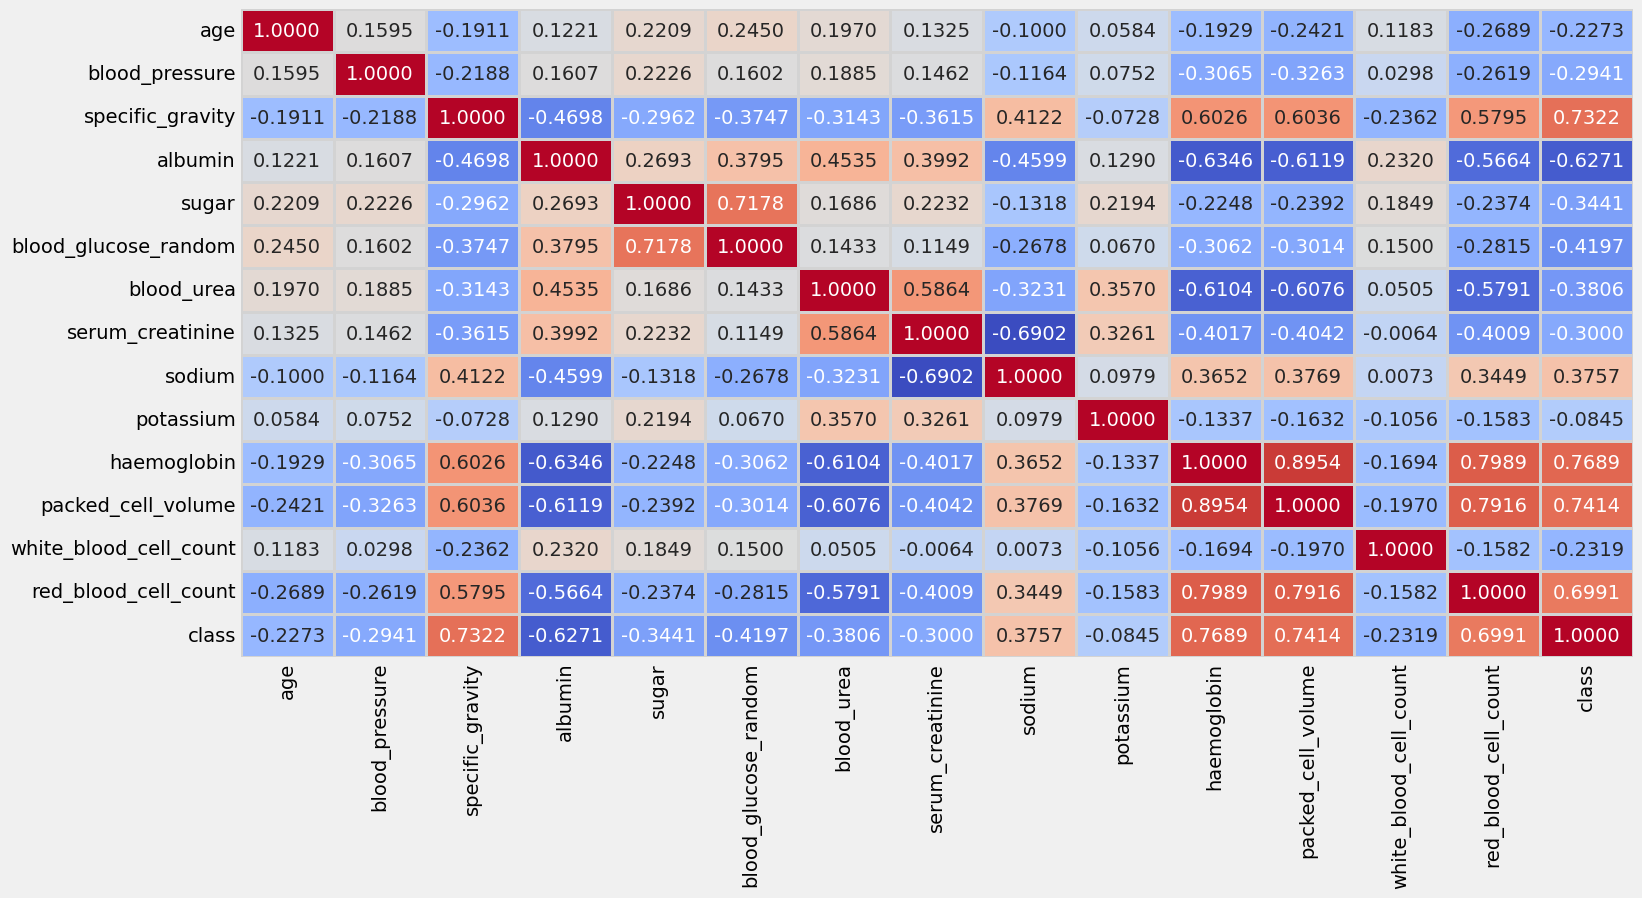

<Figure size 640x480 with 0 Axes>

In [ ]:
# heatmap of data


fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey',fmt='.4f',
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.show()
plt.savefig('corr1.png', bbox_inches='tight', pad_inches=0.0)

In [ ]:
correlations = df.corr()['class'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail())
print('\nMost Negative Correlations:\n', correlations.head())
# Make a table

Most Positive Correlations:
 red_blood_cell_count    0.699089
specific_gravity        0.732163
packed_cell_volume      0.741427
haemoglobin             0.768919
class                   1.000000
Name: class, dtype: float64

Most Negative Correlations:
 albumin                -0.627090
blood_glucose_random   -0.419672
blood_urea             -0.380605
sugar                  -0.344070
serum_creatinine       -0.299969
Name: class, dtype: float64


In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

### Data Preprocessing

In [ ]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [ ]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [ ]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [ ]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [ ]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [ ]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [ ]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [ ]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

### Feature Encoding

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,150.0,4.2,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,100.0,18.0,0.8,136.0,5.3,11.3,38.0,6000.0,3.7,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,137.0,4.3,9.6,31.0,7500.0,4.5,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,133.0,3.4,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [ ]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [ ]:
X.shape

(400, 24)

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

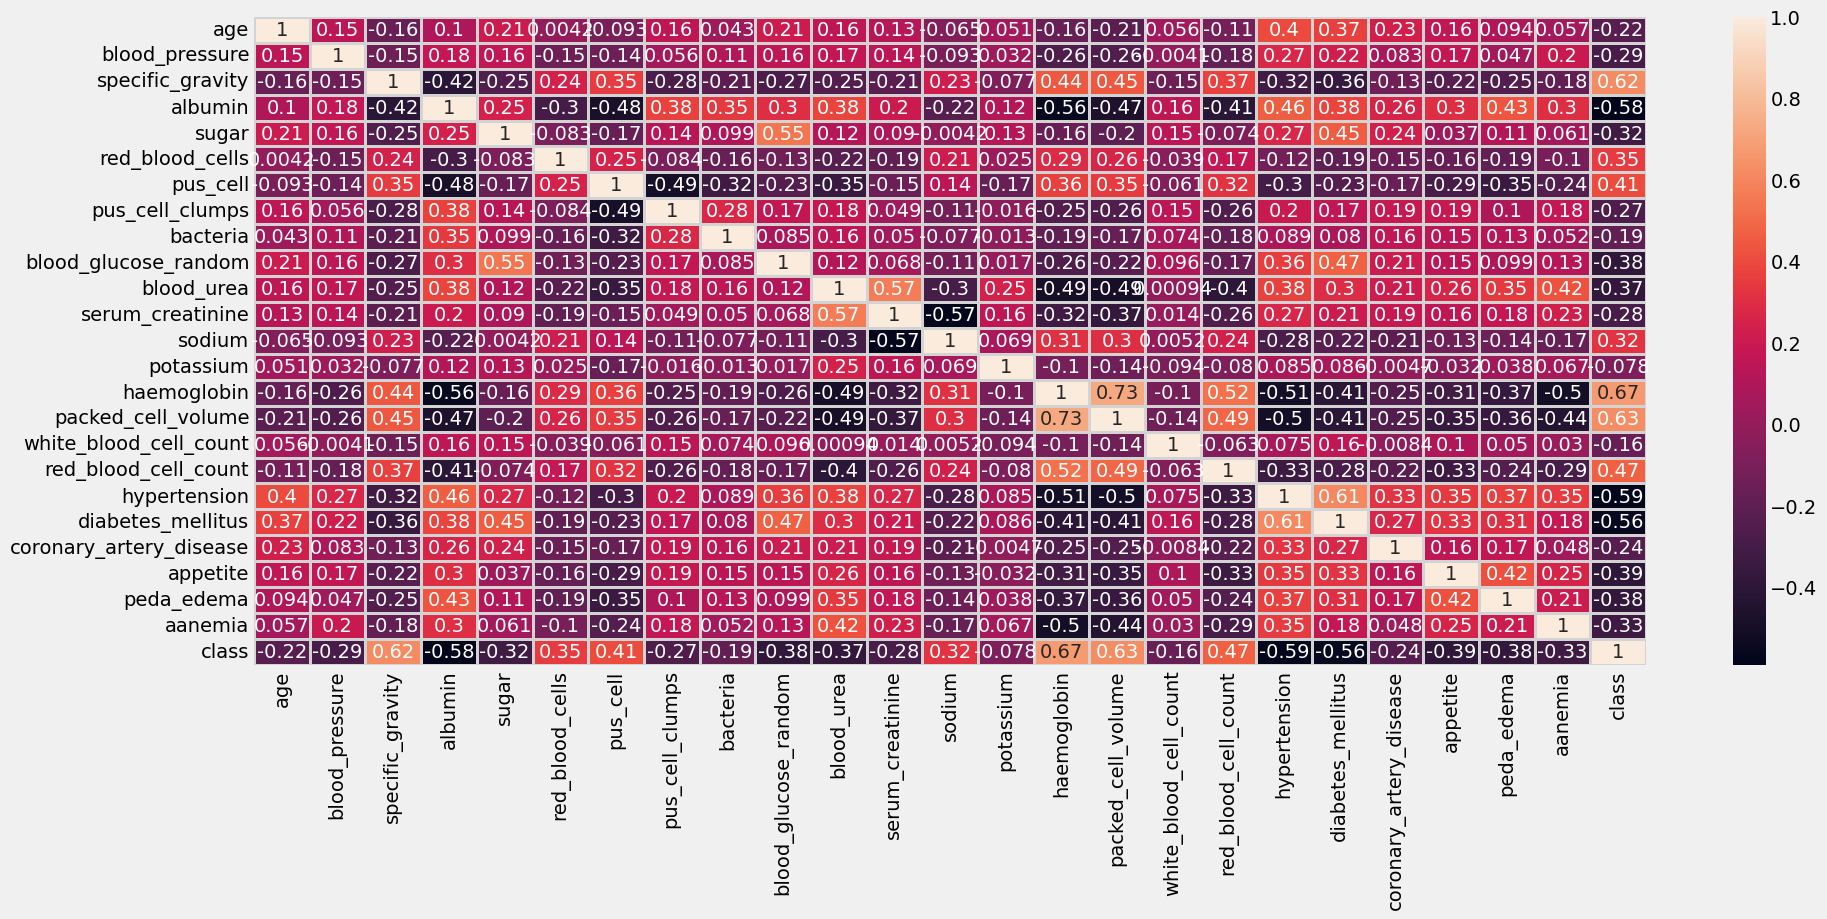

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize = (20, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()
plt.savefig('correlation.png')

In [ ]:
# Find correlations with the target and sort
correlations = df.corr()['class'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail())
print('\nMost Negative Correlations:\n', correlations.head())

# MENTION IN PAPER

Most Positive Correlations:
 red_blood_cell_count    0.468870
specific_gravity        0.617893
packed_cell_volume      0.625423
haemoglobin             0.673893
class                   1.000000
Name: class, dtype: float64

Most Negative Correlations:
 hypertension           -0.590438
albumin                -0.581638
diabetes_mellitus      -0.559060
appetite               -0.393341
blood_glucose_random   -0.382978
Name: class, dtype: float64


In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
scaler.fit(X)
# scaler1 = StandardScaler()
# scaler1.fit(X)

MinMaxScaler()

In [ ]:
new_features = scaler.transform(X)
print(new_features)

[[0.52272727 0.23076923 0.75       ... 0.         0.         0.        ]
 [0.05681818 0.         0.75       ... 0.         0.         0.        ]
 [0.68181818 0.23076923 0.25       ... 1.         0.         1.        ]
 ...
 [0.11363636 0.23076923 0.75       ... 0.         0.         0.        ]
 [0.17045455 0.07692308 1.         ... 0.         0.         0.        ]
 [0.63636364 0.23076923 1.         ... 0.         0.         0.        ]]


In [ ]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,150.0,4.2,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,100.0,18.0,0.8,136.0,5.3,11.3,38.0,6000.0,3.7,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,137.0,4.3,9.6,31.0,7500.0,4.5,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,133.0,3.4,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [ ]:
X

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,150.0,4.2,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,100.0,18.0,0.8,136.0,5.3,11.3,38.0,6000.0,3.7,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,137.0,4.3,9.6,31.0,7500.0,4.5,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,133.0,3.4,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
import pandas as pd

# Assuming X contains features and y contains the target variable

# Feature selection using filter methods
# Pearson Correlation
pearson_correlation = abs(X.corrwith(y)) > 0.3  # Adjust threshold as needed

# Chi Square
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)
chi2_scores = chi2_selector.scores_ > 10  # Adjust threshold as needed

# Feature selection using embedded methods
# Lasso L1
lasso_selector = SelectKBest(score_func=f_regression, k='all')
lasso_selector.fit(X, y)
lasso_support = lasso_selector.get_support()

# Tree-based technique (Random Forest)
rf_selector = RandomForestClassifier()
rf_selector.fit(X, y)
rf_importances = rf_selector.feature_importances_
rf_support = rf_importances > np.mean(rf_importances)

# Univariate Selection
univariate_selector = SelectKBest(score_func=f_classif, k='all')
univariate_selector.fit(X, y)
univariate_support = univariate_selector.get_support()

# Create a DataFrame to store the results
feature_selection_results = pd.DataFrame({
    'Features': X.columns,
    'Pearson': pearson_correlation,
    'Chi-2': chi2_scores,
    'Logistic': univariate_support,
    'Random Forest': rf_support,
    'Lasso': lasso_support,
})

# Convert boolean values to 'True' or 'False' strings
feature_selection_results = feature_selection_results.replace({True: 'True', False: 'False'})

# Count the total number of 'True' values for each feature
feature_selection_results['Total'] = feature_selection_results[['Pearson', 'Chi-2', 'Logistic', 'Random Forest', 'Lasso']].apply(lambda x: x.eq('True').sum(), axis=1)

# Sort the DataFrame by the 'Total' column in descending order
feature_selection_results = feature_selection_results.sort_values(by='Total', ascending=False)

# Select the best 12 features based on total count
selected_features = feature_selection_results.head(15)['Features'].tolist()

# Print the table
print("Feature Selection Results:")
print(feature_selection_results)

# Print the selected features
print("\nSelected features:")
print(selected_features)


Feature Selection Results:
                                        Features Pearson  Chi-2 Logistic  \
albumin                                  albumin    True   True     True   
haemoglobin                          haemoglobin    True   True     True   
packed_cell_volume            packed_cell_volume    True   True     True   
hypertension                        hypertension    True   True     True   
diabetes_mellitus              diabetes_mellitus    True   True     True   
blood_glucose_random        blood_glucose_random    True   True     True   
pus_cell                                pus_cell    True   True     True   
specific_gravity                specific_gravity    True  False     True   
aanemia                                  aanemia    True   True     True   
peda_edema                            peda_edema    True   True     True   
red_blood_cell_count        red_blood_cell_count    True   True     True   
appetite                                appetite    True   Tr

In [ ]:
 from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming feature_selection_results contains selected features
selected_features = feature_selection_results.head(12)['Features'].tolist()

# Extract selected features from the original dataset
X_selected = X[selected_features]

# Set the seed for reproducibility
np.random.seed(42)

# Define the number of augmented samples you want to create
num_augmented_samples = 5

# Initialize lists to store augmented data
augmented_X = []
augmented_y = []

# Loop to create augmented samples
for _ in range(num_augmented_samples):
    # Add Gaussian noise to the scaled features
    noise = np.random.normal(0, 0.1, size=X_selected.shape)
    augmented_sample = X_selected + noise

    # Clip the augmented sample to ensure values remain in the range [0, 1]
    augmented_sample = np.clip(augmented_sample, 0, 1)

    augmented_X.append(augmented_sample)
    augmented_y.append(y)

# Convert lists to NumPy arrays
augmented_X = np.vstack(augmented_X)
augmented_y = np.concatenate(augmented_y)

# Split augmented data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(augmented_X, augmented_y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)






In [ ]:
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
# Count the number of samples for each class in the augmented training set
unique_classes_train, class_counts_train = np.unique(y_train, return_counts=True)
print("Class Distribution in the Augmented Training Set:")
for cls, count in zip(unique_classes_train, class_counts_train):
    print(f"Class {cls}: {count} samples")

Class Distribution in the Augmented Training Set:
Class 0: 1006 samples
Class 1: 1006 samples


### KNN classifier

Training Accuracy of KNN is 0.967196819085487
Test Accuracy of KNN is 0.95 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       244
           1       0.89      1.00      0.94       156

    accuracy                           0.95       400
   macro avg       0.94      0.96      0.95       400
weighted avg       0.96      0.95      0.95       400



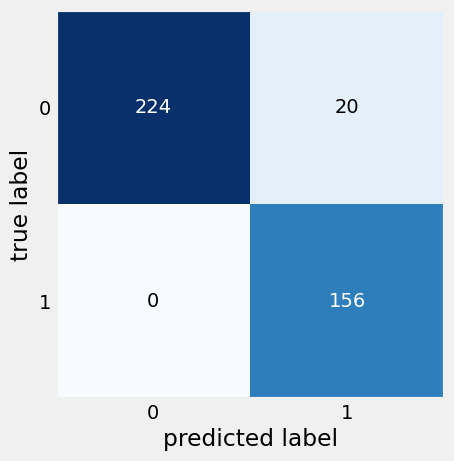

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

knn_acc = accuracy_score(y_test,knn.predict(X_test))
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, knn.predict(X_test)))
plt.show()

In [ ]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [ ]:
f1_score(y_test, knn.predict(X_test))

0.9397590361445783

### Decision Tree Classifier

Training Accuracy of KNN is 1.0
Test Accuracy of KNN is 0.925 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.91      0.94       244
           1       0.88      0.94      0.91       156

    accuracy                           0.93       400
   macro avg       0.92      0.93      0.92       400
weighted avg       0.93      0.93      0.93       400



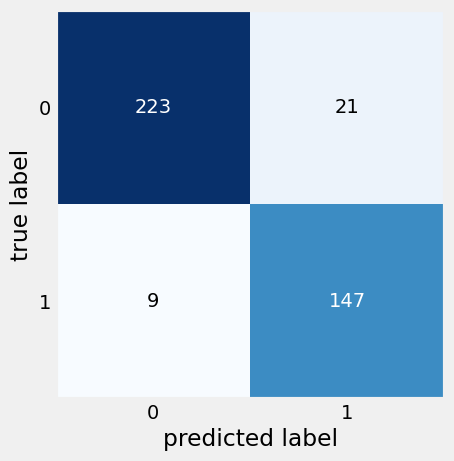

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=67)
dtc.fit(X_train,y_train)
dtc_acc = accuracy_score(y_test,dtc.predict(X_test))
print(f"Training Accuracy of KNN is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of KNN is {dtc_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, dtc.predict(X_test)))
plt.show()

### hyperparamter tuning of decision tree

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5],
    'min_samples_split' : [1, 2, 3, 5],
    'max_features' : ['auto', 'sqrt', 'log2']
}
grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=67), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [1, 2, 3, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)


{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.9443341604631927


Training Accuracy of Decision Tree Classifier is 0.9493041749502982
Test Accuracy of Decision Tree Classifier is 0.935 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       244
           1       0.87      0.99      0.92       156

    accuracy                           0.94       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.94      0.94      0.94       400



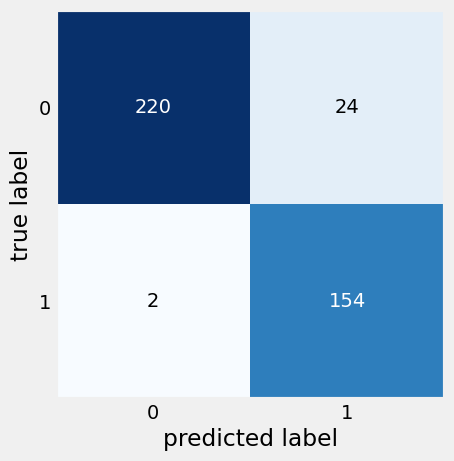

In [ ]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, dtc.predict(X_test)))
plt.show()

### Random Forest Classifier

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9525 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       244
           1       0.89      1.00      0.94       156

    accuracy                           0.95       400
   macro avg       0.95      0.96      0.95       400
weighted avg       0.96      0.95      0.95       400



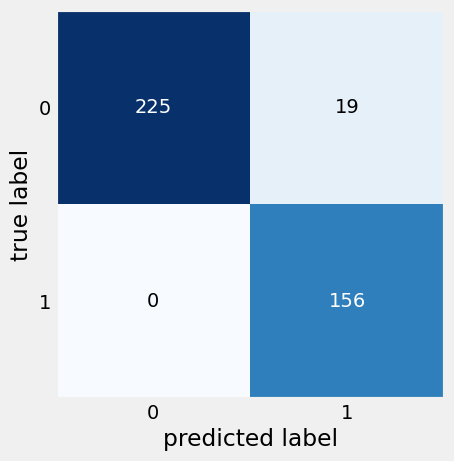

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rd_clf = RandomForestClassifier(random_state=67)
rd_clf.fit(X_train, y_train)

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, rd_clf.predict(X_test)))
plt.show()

In [ ]:
precision_score(y_test, rd_clf.predict(X_test))

0.8914285714285715

# Gradient Boost Classifier

Training Accuracy of Gradient Boosting Classifier is 0.9726640159045725
Test Accuracy of Gradient Boosting Classifier is 0.9525 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       244
           1       0.89      1.00      0.94       156

    accuracy                           0.95       400
   macro avg       0.95      0.96      0.95       400
weighted avg       0.96      0.95      0.95       400



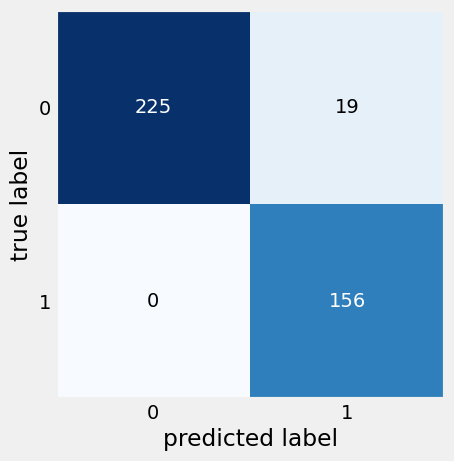

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=67)
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, gb.predict(X_test)))
plt.show()


# Stochastic Gradient Boosting

Training Accuracy of Stochastic Gradient Boosting is 0.9726640159045725
Test Accuracy of Stochastic Gradient Boosting is 0.9525 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       244
           1       0.89      1.00      0.94       156

    accuracy                           0.95       400
   macro avg       0.95      0.96      0.95       400
weighted avg       0.96      0.95      0.95       400



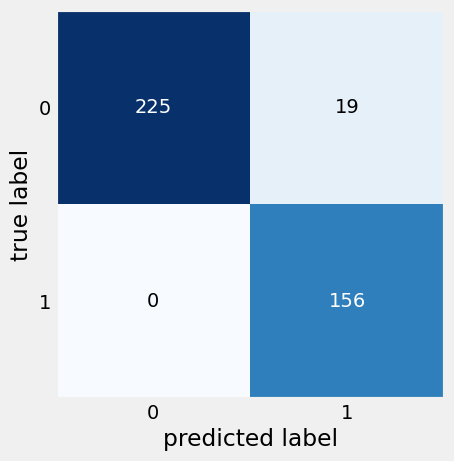

In [ ]:
sgb = GradientBoostingClassifier(random_state=67)

sgb.fit(X_train, y_train)

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, sgb.predict(X_test)))
plt.show()

In [ ]:
pip install catboost

# Cat Boost Classifier

Learning rate set to 0.5
0:	learn: 0.4177914	total: 49ms	remaining: 147ms
1:	learn: 0.3087233	total: 51.1ms	remaining: 51.1ms
2:	learn: 0.2547618	total: 53.3ms	remaining: 17.8ms
3:	learn: 0.2131283	total: 55.4ms	remaining: 0us
Training Accuracy of Cat Boost Classifier is 0.9552683896620279
Test Accuracy of Cat Boost Classifier is 0.94 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95       244
           1       0.87      1.00      0.93       156

    accuracy                           0.94       400
   macro avg       0.93      0.95      0.94       400
weighted avg       0.95      0.94      0.94       400



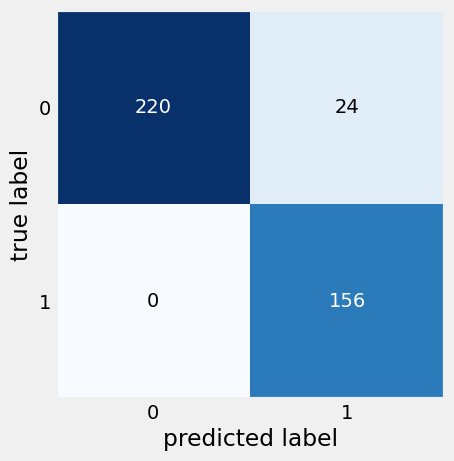

In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=4)
cat.fit(X_train, y_train)

cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, cat.predict(X_test)))
plt.show()

# Extra Tree Classifier

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.9525 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       244
           1       0.89      1.00      0.94       156

    accuracy                           0.95       400
   macro avg       0.95      0.96      0.95       400
weighted avg       0.96      0.95      0.95       400



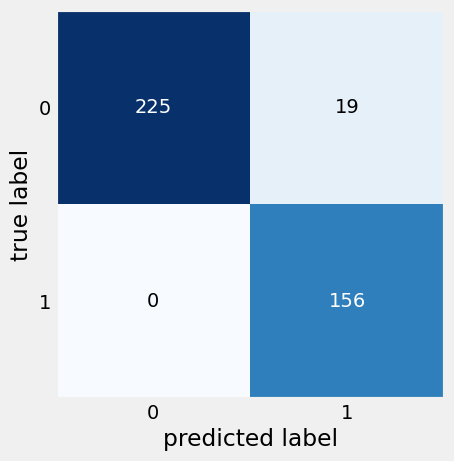

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state=67)
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, etc.predict(X_test)))
plt.show()



# LGBM Classifier

[LightGBM] [Info] Number of positive: 1006, number of negative: 1006
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 2012, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training Accuracy of LGBM Classifier is 0.9582504970178927
Test Accuracy of LGBM Classifier is 0.9425 

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       244
           1       0.88      0.98      0.93       156

    accuracy                           0.94       400
   macro avg       0.94      0.95      0.94       400
weighted avg       0.95      0.94      0.94       400



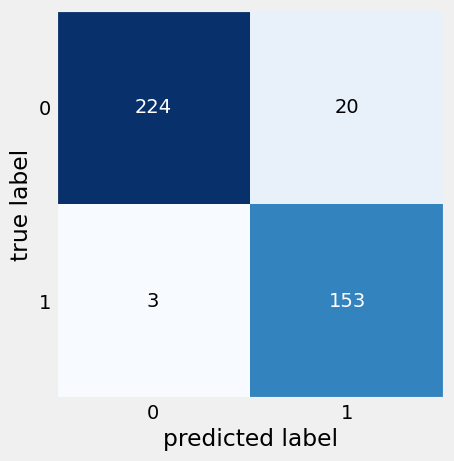

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 0.01)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")
print(classification_report(y_test, lgbm.predict(X_test)))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, lgbm.predict(X_test)))
plt.show()

In [ ]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting','Cat Boost', 'Extra Trees Classifier','LGBM Classifier'],
    'Test_Score' : [knn_acc, dtc_acc, rd_clf_acc, gb_acc, sgb_acc, cat_acc, etc_acc,lgbm_acc]
})

models.sort_values(by = 'Test_Score', ascending = False)

,Model,Test_Score
3,Gradient Boosting Classifier,0.9525
2,Random Forest Classifier,0.9525
6,Extra Trees Classifier,0.9525
4,Stochastic Gradient Boosting,0.9525
0,KNN,0.9500
7,LGBM Classifier,0.9425
5,Cat Boost,0.9400
1,Decision Tree Classifier,0.9350


In [ ]:
px.bar(data_frame = models, x = 'Test_Score', y = 'Model', color = 'Test_Score', template = 'plotly_dark',
       title = 'Models Comparison')

In [ ]:
import tensorflow
from tensorflow import keras
from keras import layers , Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import  plot_model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras import layers

In [ ]:
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.accuracy=[]
        self.val_accuracy=[]

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.accuracy.append(logs.get('accuracy'))
        self.val_accuracy.append(logs.get('val_accuracy'))

        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();

plot_losses = PlotLosses()

In [ ]:
# Initialising the ANN
model_S = Sequential()

# Adding the input layer and the first hidden layer
model_S.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
model_S.add(Dropout(rate = 0.1))

# Adding the second hidden layer
model_S.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model_S.add(Dropout(rate = 0.1))

# Adding the third hidden layer
model_S.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model_S.add(Dropout(rate = 0.1))


# Adding the output layer
model_S.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model_S.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_S.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                512       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_6 (Dense)             (None, 1)                

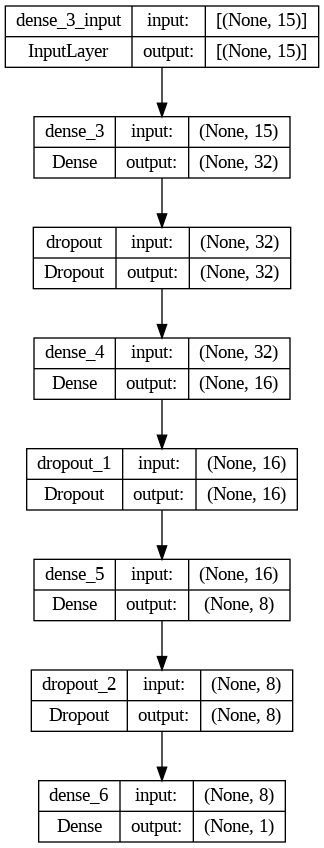

In [ ]:
plot_model(model_S, to_file='model.png', show_shapes=True)

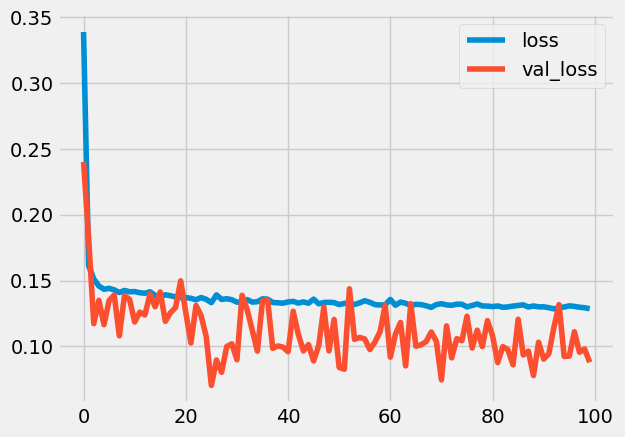

202/202 - 1s - loss: 0.1286 - accuracy: 0.9615 - val_loss: 0.0879 - val_accuracy: 1.0000 - 835ms/epoch - 4ms/step


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Assuming you have already defined the selected number of features
num_features = 12

# Define your model
model_S = Sequential([
    Dense(64, activation='relu', input_shape=(num_features,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_S.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_S.fit(X_train, y_train, epochs=100, batch_size=8, verbose=2, validation_split=0.2, callbacks=[plot_losses])


In [ ]:
score1 = model_S.evaluate(X_train,
                       y_train,
                       verbose=0)
print("\nTrain accuracy: %.1f%%" % (100.0 * score1[1]))


Train accuracy: 96.8%


In [ ]:
# model accuracy on test dataset
score = model_S.evaluate(X_test,
                       y_test,
                       verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 95.0%


In [ ]:
eval_score = model_S.evaluate(X_test, y_test)
print("Test loss:", eval_score[0])
print("Test accuracy:", eval_score[1])

13/13 [==============================] - 0s 5ms/step - loss: 0.1618 - accuracy: 0.9500
Test loss: 0.16182778775691986
Test accuracy: 0.949999988079071


In [ ]:
from sklearn.metrics import recall_score

In [ ]:
y_hat = model_S.predict(X_test)

13/13 [==============================] - 0s 5ms/step


In [ ]:
y_hat.round()

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],

In [ ]:
print(classification_report(y_test, y_hat.round()))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       244
           1       0.89      1.00      0.94       156

    accuracy                           0.95       400
   macro avg       0.94      0.96      0.95       400
weighted avg       0.96      0.95      0.95       400



In [ ]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting','Cat Boost', 'Extra Trees Classifier','LGBM Classifier',"ANN"],
    'Training_Score' : [accuracy_score(y_train, knn.predict(X_train)),accuracy_score(y_train, dtc.predict(X_train)),accuracy_score(y_train, rd_clf.predict(X_train)),
                        accuracy_score(y_train, gb.predict(X_train)),accuracy_score(y_train, sgb.predict(X_train)),
                        accuracy_score(y_train, cat.predict(X_train)),accuracy_score(y_train, etc.predict(X_train)),accuracy_score(y_train, lgbm.predict(X_train)),score1[1]],
    'Test_Score' : [knn_acc, dtc_acc, rd_clf_acc, gb_acc, sgb_acc, cat_acc, etc_acc,lgbm_acc,(score[1])]

})

models.sort_values(by = 'Test_Score', ascending = False)

,Model,Training_Score,Test_Score
2,Random Forest Classifier,1.000000,0.9525
4,Stochastic Gradient Boosting,0.972664,0.9525
3,Gradient Boosting Classifier,0.972664,0.9525
6,Extra Trees Classifier,1.000000,0.9525
0,KNN,0.967197,0.9500
8,ANN,0.968191,0.9500
7,LGBM Classifier,0.958250,0.9425
5,Cat Boost,0.955268,0.9400
1,Decision Tree Classifier,0.949304,0.9350


In [ ]:
  pip install -U kaleido

In [ ]:
fig = px.bar(models, x='Model', y = 'Test_Score',color = 'Test_Score',
            title="Models Comparison")
fig.update_layout(xaxis={'categoryorder': 'total ascending'})
fig.show()


In [ ]:
pip install matplotlib --upgrade


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
Model = ( 'KNN', 'DTC', 'RFC',
             'GBC', 'SGB','CB', 'ETC','LGBM',"ANN")

# Without Normalization

In [ ]:
precision1 = [49
,93
,100
,93
,93
,90
,100
,93
,77
]
prnorm1=[98
,93
,97
,93
,93
,90
,100
,100
,100

]

In [ ]:
recall1 = [49
,86
,86
,86
,86
,86
,88
,86
,100

]
recnorm1=[95
,88
,91
,88
,88
,86
,93
,88
,95
]

In [ ]:

f1_score1 =[49
,89
,92
,89
,89
,88
,94
,89
,87

]
f1norm1=[96
,90
,94
,90
,90
,88
,96
,94
,98

]

In [ ]:
x = np.arange(len(Model))
width = 0.3

In [ ]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

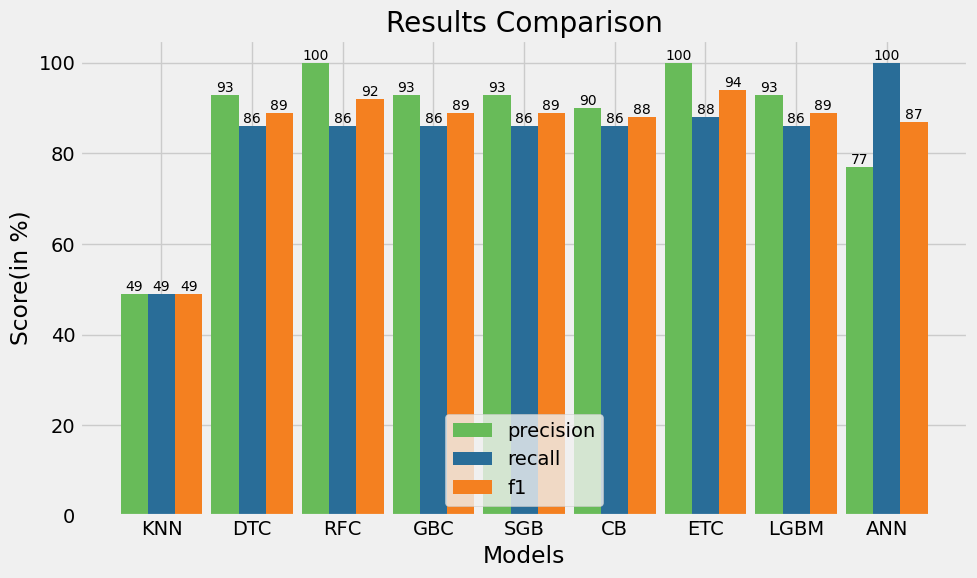

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

bar1 = ax.bar(x, precision1, width, label='precision',color = '#68bb59')
bar2 = ax.bar(x + width, recall1, width, label='recall',color = '#296d98')
bar3 = ax.bar(x + width*2, f1_score1, width, label='f1',color="#f48020")

ax.set_ylabel('Score(in %)')
ax.set_xlabel('Models')
ax.set_title('Results Comparison')
ax.set_xticks(x+width,Model)
ax.legend(loc="lower center")

#setting bar labels
ax.bar_label(bar1,fontsize=10)
ax.bar_label(bar2,fontsize=10)
ax.bar_label(bar3,fontsize=10)

fig.tight_layout()
plt.savefig("results_before_norm.jpeg")
plt.show()

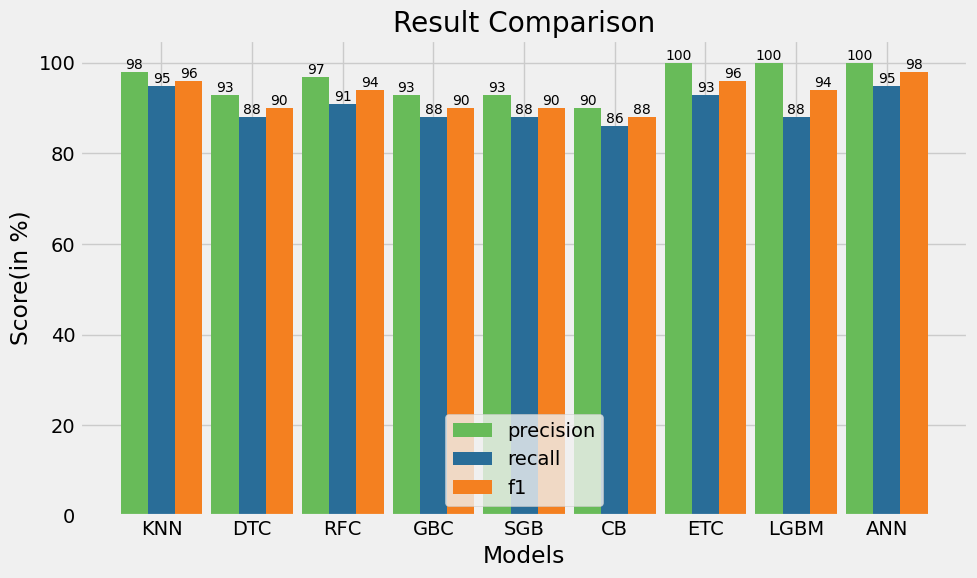

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

bar1 = ax.bar(x, prnorm1, width, label='precision',color = '#68bb59')
bar2 = ax.bar(x + width, recnorm1, width, label='recall',color = '#296d98')
bar3 = ax.bar(x + width*2, f1norm1, width, label='f1',color = "#f48020")

ax.set_ylabel('Score(in %)')
ax.set_xlabel('Models')
ax.set_title('Result Comparison')
ax.set_xticks(x+width,Model)
ax.legend(loc="lower center")

#setting bar labels
ax.bar_label(bar1,fontsize=10)
ax.bar_label(bar2,fontsize=10)
ax.bar_label(bar3,fontsize=10)

fig.tight_layout()
plt.savefig("results_after_normalization.jpeg")
plt.show()